In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plots(X,y,xtest,pred):
    plt.scatter(X,y)
    plt.plot(xtest,pred,color='red')
    plt.show()

## Regressão Linear Simples

### Correlação Linear

$$
r = \frac{n \cdot \sum(x \cdot y) - \sum{(x \cdot y)}}{\sqrt{[n \cdot \sum{x²} - (\sum{x})²]}-\sqrt{[n \cdot \sum{y²} - (\sum{y})²]} }
$$

> Resultado entre [-1,1] \
> Usado para mostra a relação entre o atributo depedente e independente

### Regressão Linear simples

$$ y = \theta_0 + X \cdot \theta_1 $$
* $y$..: valor previsto
* $X$..: caracteristica
* $\theta_0$.: intercepto | coeficiente linear
    * $$\theta_0 = \frac{\sum((X - X_{media}) \cdot (y- y_{media}))}{(\sum(X - X_{media})²)}$$
* $\theta_1$.: coeficiente angular
    * $$ \theta_1  = y_{media} - \theta_1 * X_{media}$$


### Metricas
#### Error Médio Absuluto
$\frac{1}{m} \sum^{m}_{i=0}|ytrue_i - pred_i|$ 
#### Raiz do erro quadratico médio
$\frac{1}{m} \sqrt{\sum^{m}_{i=0}(ytrue_i - pred_i)^2}$ 
#### R2 
$1 - \frac{\sum(ytrue - pred)^2}{\sum(ytrue - ytrue_{media})²}$

In [4]:
class Stats:
    def __init__(self,X:np.array,y:np.array):
        self.m = np.size(X)
        self.X = X
        self.y = y
    
    def Corr(self):
        p1 = (self.m * np.sum(self.X * self.y)) - (np.sum(self.X) *  np.sum(self.y))
        p2_0 = np.around(( self.m * np.sum(self.X**2) ) - (np.sum(self.X)**2),3)
        p2_1 = np.around(( self.m * np.sum(self.y**2) ) - (np.sum(self.y)**2),3)
        
        return p1/np.sqrt(np.abs(p2_0 * p2_1))
    
    def Root_Mean_squared_error(self,pred,ytrue):
        return np.sqrt( np.mean((pred-ytrue)**2) )

    def Mean_absolute_error(self,pred,ytrue):
        return np.mean(abs(pred-ytrue))
    
    def r2_Score(self,pred,ytrue):
        return 1 - (np.sum((ytrue-pred)**2))/(np.sum((ytrue - np.mean(ytrue))**2))
    

In [5]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

&nbsp;

&nbsp;

## Regressão Linear 
### Equação Preditiva do modelo
$$
\^{y} = \theta_0 + \theta_1 \cdot x_1 + ....... + \theta_n \cdot x_n
$$
* $\^{y}$...: Valor previsto
* $\theta_0$..: Coeficiente angular| intercepto
* $\theta_1$..: Peso das caracteristicas
* $x_n$..: Valor das caracteristicas

In [43]:
from sklearn.base import RegressorMixin
from typing       import Literal

class RegressaoLinear(RegressorMixin):
    theta = None
    def __init__(self,Type:Literal['Simples','Normal','SVD']='Simples') -> None:
        self.Type = Type
        

    def fit(self,X:np.array ,y:np.array):
        m  = np.size(X,axis=0)
        Xb = np.c_[ np.ones((m,1)) , X]

        match self.Type:
            case 'Simples':
                coef       = np.sum((X - np.mean(X)) * (y - np.mean(y))) / (np.sum((X - np.mean(X))**2))
                intercept  = np.mean(y) - coef * np.mean(X) 
                self.theta = np.array([[intercept],[coef]])

            case 'SVD':
                U , S ,Vt = np.linalg.svd(Xb,full_matrices=False)
                self.theta = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ y
            
            case 'Normal':
                self.theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)

        

        return self.theta 
    def predict(self,X):
        soma = 0
        for i in range(np.size(X,axis=1)):
            soma += self.theta[i+1] * X[:,i] 
        return self.theta[0] + soma 

In [45]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('dataset/Salário.csv')
X = data['Experiencia']
y = data['Salario']
xtrain , xtest , ytrain, ytest = train_test_split(X.values,y.values,random_state=42,test_size=5)

In [44]:
stats = Stats(X,y)
stats.Corr()

0.987938808410141

In [42]:
reg = RegressaoLinear('Simples')
reg.fit(xtrain,ytrain)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


array([[2853.97865023],
       [1085.48432035]])

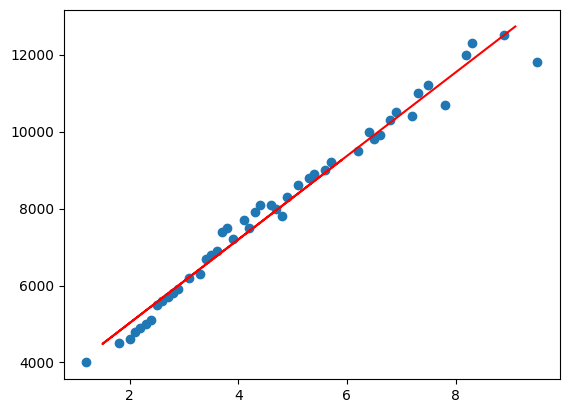

In [46]:
plots(xtrain,ytrain,xtest,reg.predict(xtest))

In [ ]:
print('Absulute error:',stats.Mean_absolute_error(reg.predict(xtest),ytest))
print('R2............: ',stats.r2_Score(reg.predict(xtest),ytest))
print('Squared.......:',stats.Root_Mean_squared_error(reg.predict(xtest),ytest))

Absulute error: 391.66722806492305
R2............:  0.941938262691848
Squared.......: 578.4245456967533
